<h1 style="text-align:center"><b>Tugas Klastering Twitter</b></h1>

<hr>
<table>
    <tr>
        <td><b>NIM</b></td>
        <td>:</td>
        <td>20.01.53.0033</td>
    </tr>
    <tr>
        <td><b>Nama</b></td>
        <td>:</td>
        <td>MUHAMMAD FALAH ABDURRAFI</td>
    </tr>
    <tr>
        <td><b>Progdi</b></td>
        <td>:</td>
        <td>Teknik Informatika - S1</td>
    </tr>
    <tr>
        <td><b>Mata Kuliah</b></td>
        <td>:</td>
        <td>Text Mining</td>
    </tr>
    <tr>
        <td><b>Kelas</b></td>
        <td>:</td>
        <td>A1</td>
    </tr>
    <tr>
        <td><b>Dosen Pengampu</b></td>
        <td>:</td>
        <td>Dr. Drs. ERI ZULIARSO, M.Kom.</td>
    </tr>
</table>
<hr>

<br><br>
<h1><b>1. Scrapping (SNScrape)</b></h1>
<hr>

<br>
<h3><b>1.1. Import Library</b></h3>

In [1]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

<br>
<h3><b>1.2. Menentukan Variabel Pencarian</b></h3>
<ul>
    <li>Kata kunci pencarian = <b>pssi</b></li>
    <li>Batas awal dan akhir dari tanggal tweet di-post = <b></b></li>
    <li>Batas maksimum tweet yang dicari = <b></b></li>
    <li>Nama file dari output pencarian yang berupa file JSON = <b>tweet.json</b></li>
    <li>Bahasa yang digunakan oleh tweet yang dicari = <b>Indonesia</b></li>
</ul>

In [85]:
keywords=['pssi']
start="2022–09–01"
end ="2022–10–03"
max_num=100
fname='tweet.json' 
languages=['id']

<br>
<h3><b>1.3. Proses Scrapping</b></h3>
<ul>
    <li>Melakukan proses scrapping tweet menggunakan <b><i>SNScrape</i></b> berdasarkan variabel-variabel yang sudah ditentukan sebelumnya.</li>
    <li>Akan mengembalikan file JSON yang berisi <b><i>id, username, date, text, url</i></b>.</li>
    <li>Khusus data <b><i>text</i></b> (tweet) dari JSON akan disimpan ke dalam sebuah list tersendiri, yaitu <b><i>documents_twitter</i></b>.</li>
</ul>

In [86]:
documents_twitter = []

for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
            
            documents_twitter.append(data['text'])
            
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                print(line)
                f.write(line)
                f.write('\n')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4344\3992385352.py:14: FutureWarning: username is deprecated, use user.username instead
  data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}


{"id": 1581232676526510080, "username": "panditfootball", "date": "2022-10-15 10:37:02+00:00", "text": "Pemerintah tidak akan memberikan izin bergulirnya liga jika PSSI belum melakukan perubahan dan kesiapan dalam mengelola liga.\n\nSebelum itu, PSSI telah mengatakan jika liga diperkirakan akan berjalan pada tanggal 25 - 26 November 2022. https://t.co/oYYtX46QvQ", "url": "https://twitter.com/panditfootball/status/1581232676526510080"}
{"id": 1581232516723134465, "username": "RisdaDais", "date": "2022-10-15 10:36:24+00:00", "text": "Terupdate! Kompetisi Liga 1 2022 Resmi Dilanjutkan, Ketua Umum PSSI Bocorkan Jadwal Persib Vs Persija Jakarta\n#PERSIB #PersijaJakarta #PSSI #Kanjuruhan #pssiwajibtanggungjawab https://t.co/HmJq0c4OS6", "url": "https://twitter.com/RisdaDais/status/1581232516723134465"}
{"id": 1581232473475686405, "username": "DulCharem", "date": "2022-10-15 10:36:14+00:00", "text": "@iIhamzada Ampun DJ Menpora pasang badan buat ketum PSSI Irwan bule dkk😜😜😜😜😜🤣🤣🤣PECAT Pak @jok

<br><br><br>
<h1><b>2. Preprocessing</b></h1>
<ul>
    <li>Case Folding</li>
    <li>Stemming</li>
    <li>Filtering (Stopword Remover)</li>
</ul>
<hr>

<br>
<h3><b>2.1. Import Library</b></h3>

In [87]:
import re
import string

<br>
<h3><b>2.2. Listing Utama</b></h3>

Buat object untuk stemming.

In [88]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

Buat object untuk filtering (StopWordRemover).

In [89]:
# Buat StopWordRemover
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

Melakukan proses case folding, stemming, dan filtering.

In [90]:
documents_clean=[]

for d in documents_twitter:
  
  # BEGIN: Case Folding

  # Remove Unicode
  document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
  # Remove URL
  document_test = re.sub(r'http\S+', '', document_test)
  # Remove Mentions
  document_test = re.sub(r'@\w+', '', document_test)
  # Lowercase the document
  document_test = document_test.lower()
  # Remove punctuations
  document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
  # Remove the numbers
  document_test = re.sub(r'[0-9]', '', document_test)
  # Remove the doubled space
  outputcase = re.sub(r'\s{2,}', ' ', document_test)
    
  # END: Case Folding
    
  # Proses Stemming
  outputstem = stemmer.stem(outputcase)

  # Proses Filtering (StopwordRemover)
  outputstop = stopword.remove(outputstem)

  documents_clean.append(outputstop)

In [73]:
documents_clean[6]

'picu jatuh korban tragedi kanjuruhan polri tegas tak guna gas air mata laga sepak bola fifa menpora polri pssi'

<br><br><br>
<h1><b>3. Representasi Kata Sebagai Vektor </b></h1>
<p>Kata-kata yang sudah diperoleh di atas masih belum dapat dipahami oleh model <b><i>NLP (Natural language Processing)</i></b>.</p>
<p>Oleh karena itu, kata-kata tersebut perlu direpresentasikan dalam bentuk angka-angka vektor agar dapat dipahami oleh model.</p>
<p>Terdapat dua metode yang sering digunakan, yaitu <b>TF-IDF</b> dan <b>Bag of Words</b></p>
<hr>

<br>
<h3><b>3.1. Metode <i>TF-IDF Vectorizer</i></b></h3>
<ul>
    <li><p><b>TF-IDF</b> <i>(Term Frequency - Inverse Document Frequency)</i></p></li>
    <li><p>Dalam merepresentasikan kata sebagai vektor, metode ini akan mempertimbangkan apakah data tersebut relevan/informatif terhadap isi dokumen.</p></li>
</ul>

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names_out()

<br>
<h3><b>3.2. Metode <i>Count Vectorizer</i></b> (Bag of Words)</h3>
<p>Metode ini merupakan metode yang sangat sederhana, hanya menghitung frekuensi kemunculan kata pada seluruh dokumen.</p>

<h5><b>3.2.1. Import Library</b></h5>

In [92]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

<h5><b>3.2.2. Proses representasi vektor.</b></h5>

In [92]:
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

<h5><b>3.2.3. Membuat plot berdasarkan kata dan frekuensinya.</b></h5>

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

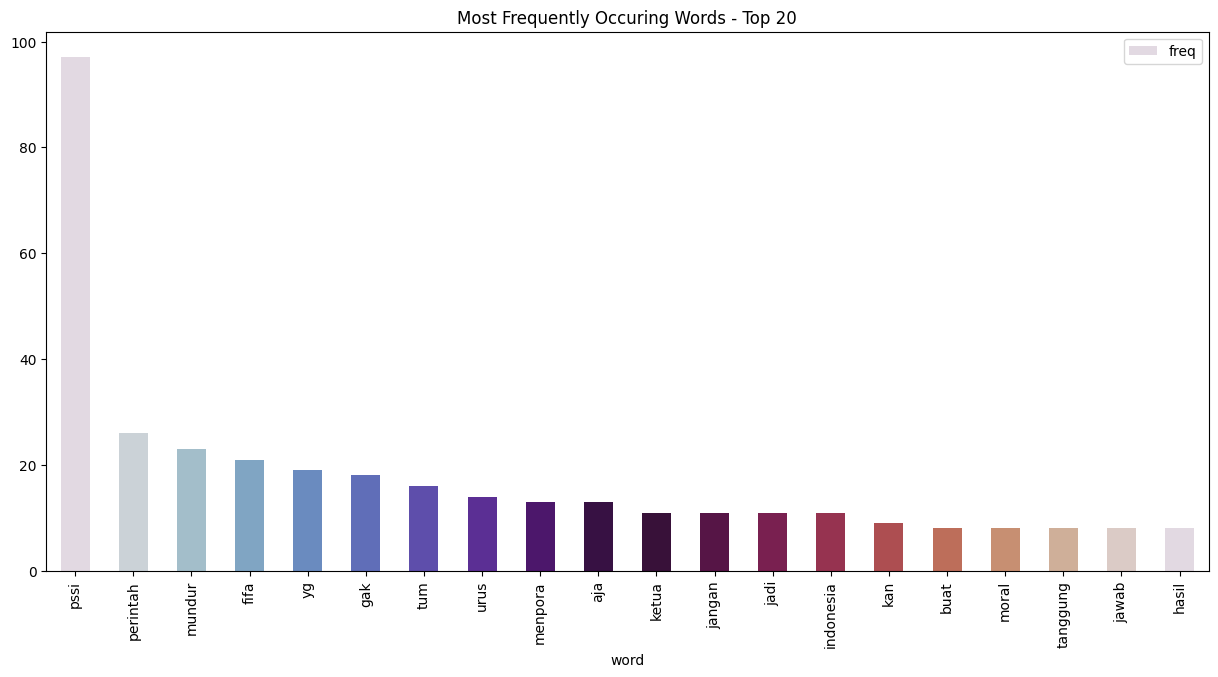

In [92]:
color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

<br><br>
<h1><b>4. Klastering</b> <i>(K-Means Clustering)</i></h1>
<hr>

<h4><b>4.1. Import Library</b></h4>

In [93]:
from sklearn.cluster import KMeans

<br>
<h4><b>4.2. Listing Utama</b></h4>

In [94]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [95]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names_out()

for i in range(true_k):
  print("Cluster %d:" % i),
  
  for ind in order_centroids[i, :10]:
      print(' %s' % terms[ind]),
  
  print()

Cluster 0:
 buat
 tanding
 fifa
 sepakbola
 siapa
 negara
 prof
 pssi
 federasi
 kerjasama

Cluster 1:
 pssi
 perintah
 mundur
 yg
 fifa
 gak
 tum
 urus
 menpora
 aja

Cluster 2:
 lah
 cari
 gitu
 fifa
 makan
 gt
 kan
 antek
 komandan
 sama



In [96]:
print("Prediction")
Y = cv.transform(["piala dunia"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["ronaldo"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [1]
Cluster number : [1]
